In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter 
import re
plt.rcParams['font.sans-serif'] = ['SimHei']#用来正常显示中文标签
mpl.rcParams["axes.unicode_minus"] = False
%matplotlib inline

In [55]:
"""导入数据"""
data_bra = pd.read_csv("bra.csv")
data_color = pd.read_csv("colors.csv")

In [95]:
"""检查数据并处理缺失值"""
data_bra.head() #检查bra.csv数据 

,creationTime,productColor,productSize
0,2016-06-08 17:17:00,22咖啡色,75C
1,2017-04-07 19:34:25,22咖啡色,80B
2,2016-06-18 19:44:56,02粉色,80C
3,2017-08-03 20:39:18,22咖啡色,80B
4,2016-07-06 14:02:08,22咖啡色,75B


In [96]:
data_color.head()    #检查colors.csv数据

,Unnamed: 0,0,1
0,0,22咖啡色,棕色
1,1,02粉色,粉色
2,2,071蓝色,蓝色
3,3,071黑色,黑色
4,4,071肤色,肤色


In [97]:
data_bra = data_bra.dropna()    #删除任何包含NA的行

In [98]:
data_color = data_color.dropna()    #删除任何包含NA的行

In [99]:
"""将数据转变为数组，并将数据类型变为字符串"""
array_bra = np.array(data_bra).astype('str')    
array_color = np.array(data_color).astype('str') 

In [104]:
#Counter(array_color[:,1])    #确定color.csv文件标号为0的列包含颜色状况

In [101]:
#Counter(array_color[:,2])    #确定color.csv文件标号为1的列包含颜色状况

In [102]:
#Counter(array_bra[:,1])    #确定bra.csv文件标签为productSize的分布情况

In [103]:
#Counter(array_bra[:,2])    #确定bra.csv文件标签为productColor的分布情况

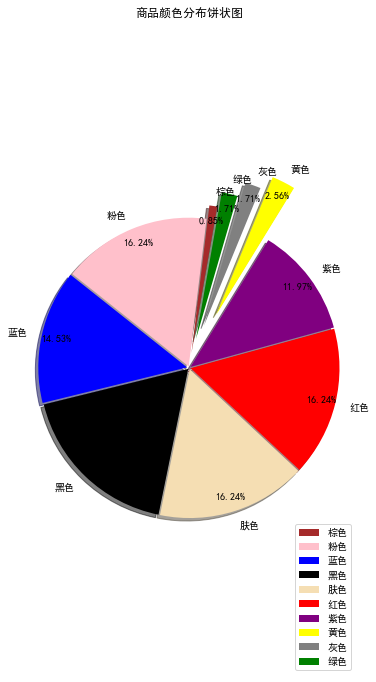

In [105]:
"""绘制color.csv文件中的商品颜色分布统计图"""
plt.figure(figsize=(6,12)) #调节图形大小
labels = [u'棕色',u'粉色',u'蓝色',u'黑色',u'肤色',u'红色',u'紫色',u'黄色',u'灰色',u'绿色'] #定义标签
sizes = [1,19,17,21,19,19,14,3,2,2] #每块值
colors = ['brown','pink','blue','black','wheat','red','purple','yellow','gray','green'] #每块颜色定义
explode = (0.1,0.01,0.015,0.01,0.01,0.01,0.01,0.4,0.3,0.2) #将某一块分割出来，值越大分割出的间隙越大
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%', #数值保留固定小数位
                      shadow = True, #无阴影设置
                      startangle =80, #逆时针起始角度设置
                      pctdistance = 0.9) #数值距圆心半径倍数的距离
#patches饼图的返回值，texts1饼图外label的文本，texts2饼图内部的文本
# x，y轴刻度设置一致，保证饼图为圆形
plt.title('商品颜色分布饼状图')
plt.axis('equal')
plt.legend(loc=4)
plt.show()

In [106]:
bra_color = array_bra[:,1] 
col_color = array_color[:,1] 
color_name = {}  #bra数据中更改为10种简单颜色命名
for i in range(bra_color.shape[0]):
    color_name[i] = array_color[col_color == bra_color[i],2][0]
   # print(color_name[i])
#len(color_name)

In [107]:
"""统计bra.csv文件中的卖出商品颜色统计图"""
ls_color = list(color_name.values())  #转化为列表
Counter(ls_color)

Counter({'棕色': 51,
         '粉色': 2000,
         '蓝色': 3423,
         '黑色': 2142,
         '肤色': 2169,
         '红色': 2715,
         '紫色': 2505,
         '黄色': 268,
         '灰色': 126,
         '绿色': 97})

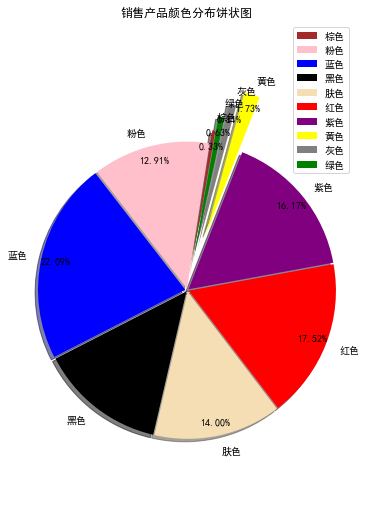

In [108]:
plt.figure(figsize=(6,9)) #调节图形大小
labels = [u'棕色',u'粉色',u'蓝色',u'黑色',u'肤色',u'红色',u'紫色',u'黄色',u'灰色',u'绿色'] #定义标签
sizes = [51,2000,3423,2142,2169,2715,2505,268,126,97] #每块值
colors = ['brown','pink','blue','black','wheat','red','purple','yellow','gray','green'] #每块颜色定义
explode = (0.1,0.01,0.015,0.01,0.01,0.01,0.01,0.4,0.3,0.2) #将某一块分割出来，值越大分割出的间隙越大
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%', #数值保留固定小数位
                      shadow = True, #无阴影设置
                      startangle =80, #逆时针起始角度设置
                      pctdistance = 0.9) #数值距圆心半径倍数的距离
#patches饼图的返回值，texts1饼图外label的文本，texts2饼图内部的文本
# x，y轴刻度设置一致，保证饼图为圆形
plt.title('销售产品颜色分布饼状图')
plt.axis('equal')
plt.legend(loc=1)
plt.show()

In [125]:
"""统计bra.csv文件中的卖出商品尺码统计图"""
productSize = array_bra[:,2]
res = []
for i in productSize:
    res.append(re.findall(r'[A-Za-z]', i)[0]) #使用正则提取尺码信息（且只取第一个字母）
productCup = pd.value_counts(res) 
print(productCup)
num_cup = []
num_cup_A = cup.loc['A'] + cup.loc['a']
num_cup_B = cup.loc['B']
num_cup_C = cup.loc['C'] + cup.loc['c'] 
num_cup_D = cup.loc['D']
num_cup_E = cup.loc['E']
num_cup.append(num_cup_A)
num_cup.append(num_cup_B)
num_cup.append(num_cup_C)
num_cup.append(num_cup_D)
num_cup.append(num_cup_E)
#print(num_cup)

B    12399
C     1266
A      968
D      423
L      152
M      113
X       75
a       65
E       34
c        1
dtype: int64


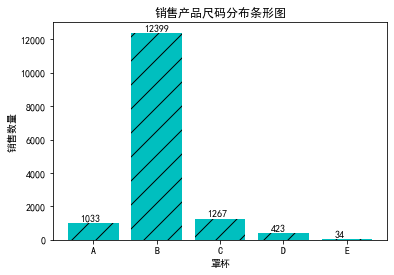

In [123]:
"""统计bra.csv文件中的销售商品尺码统计图"""
x = cup_size
y = num_cup
# 生产柱状图
plt.bar(x,y,align="center",color="c",tick_label=["A","B","C","D","E"],hatch="/")
# 给条形图添加数据标注
for x, y in enumerate(num_cup):
    plt.text(x-0.2, y+100, "%s" %y)
# 设置x，y轴标签
plt.xlabel("罩杯")
plt.ylabel("销售数量")
plt.title("销售产品尺码分布条形图")
plt.show()